In [1]:
#!conda install -c defaults cudatoolkit=11.2 cudnn=8.1.0

In [2]:
#!pip uninstall protobuf 

#!pip install protobuf==3.19.4
#! pip install tensorflow --upgrade --user

#!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/
#!python3 -m pip install tensorflow
# Verify install:
#!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [3]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12079266329315269115
xla_global_id: -1
]


In [5]:
data = pd.read_csv('total.csv')

In [6]:
data = data.drop(columns=['clase_pri', 'clase_otr','clases'])

In [7]:
data

,titulo,abstract,categorias
0,An Actor-Critic Algorithm for Sequence Prediction,We present an approach to training neural ne...,['cs.LG']
1,Playing Flappy Bird via Asynchronous Advantage...,"Flappy Bird, which has a very high popularit...","['cs.LG', 'cs.NE']"
2,Distributional Advantage Actor-Critic,"In traditional reinforcement learning, an ag...","['cs.LG', 'cs.AI', 'stat.ML']"
3,Off-Policy Actor-Critic,This paper presents the first actor-critic a...,['cs.LG']
4,Asymmetric Actor Critic for Image-Based Robot ...,Deep reinforcement learning (RL) has proven ...,"['cs.RO', 'cs.AI', 'cs.LG']"
...,...,...,...
36859,A Ray-based Approach for Boundary Estimation o...,Diffusion Tensor Imaging (DTI) is a non-invasi...,['cs.CV']
36860,Statistical Denoising for single molecule fluo...,Single molecule fluorescence microscopy is a p...,['cs.CV']
36861,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
36862,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"


In [8]:
data["categorias"] = data["categorias"].apply(
    lambda x: literal_eval(x)
)
data["categorias"].values[:5]

array([list(['cs.LG']), list(['cs.LG', 'cs.NE']),
       list(['cs.LG', 'cs.AI', 'stat.ML']), list(['cs.LG']),
       list(['cs.RO', 'cs.AI', 'cs.LG'])], dtype=object)

In [9]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(
    data,
    test_size=test_split,
    stratify=data["categorias"].values,
)
# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

In [10]:
terms = tf.ragged.constant(train_df["categorias"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.CR', 'math.OC', 'eess.SP', 'cs.GR', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'cs.MA', 'eess.SY', 'cs.HC', 'cs.CY', 'math.IT', 'cs.IT', 'cs.DC', 'stat.AP', 'stat.TH', 'math.ST', 'stat.ME', 'eess.AS', 'q-bio.QM', 'cs.SD', 'q-bio.NC', 'cs.DS', 'cs.NI', 'cs.GT', 'cs.CG', 'cs.SE', 'I.2.6', 'stat.CO', 'math.NA', 'physics.chem-ph', 'cs.NA', 'cs.DB', 'quant-ph', 'cs.PL', 'q-bio.BM', 'cs.LO', 'cond-mat.dis-nn', '68T45', 'math.PR', 'physics.comp-ph', 'cs.CE', 'cs.AR', 'I.2.10', 'q-fin.ST', 'physics.data-an', 'cond-mat.stat-mech', 'cs.CC', '68T05', 'math.DS', 'I.4.6', 'physics.ao-ph', 'econ.EM', 'astro-ph.IM', 'physics.soc-ph', 'math.AT', 'cs.DM', 'q-bio.GN', 'physics.med-ph', 'cs.PF', 'I.4.8', 'cs.FL', 'cond-mat.mtrl-sci', 'I.5.4', 'I.4', '68U10', 'q-fin.TR', 'cond-mat.str-el', 'cond-mat.mes-hall', 'I.2', 'physics.geo-ph', '68T10', 'physics.optics', 'physics.flu-dyn', 'math.AP', 'hep-ex', 'I.2.6; I.

In [11]:
sample_label = train_df["categorias"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.CV']
Label-binarized representation: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
train_df["abstract"].apply(lambda x: len(x.split(" "))).describe()

count    29491.000000
mean       156.346580
std         41.566468
min          5.000000
25%        128.000000
50%        154.000000
75%        183.000000
max        462.000000
Name: abstract, dtype: float64

In [13]:
max_seqlen = 155
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["categorias"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["abstract"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [14]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [15]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'Recent neural-network-based architectures for image segmentation make\nextensive usage of feature forwarding mechanisms to integrate information from\nmultiple scales. Although yielding good results, even deeper architectures and\nalternative methods for feature fusion at different resolutions have been\nscarcely investigated for medical applications. In this work we propose to\nimplement segmentation via an encoder-decoder architecture which differs from\nany other previously published method since (i) it employs a very deep\narchitecture based on residual learning and (ii) combines features via a\nconvolutional Long Short Term Memory (LSTM), instead of concatenation or\nsummation. The intuition is that the memory mechanism implemented by LSTMs can\nbetter integrate features from different scales through a coarse-to-fine\nstrategy; hence the name Coarse-to-Fine Context Memory (CFCM). We demonstrate\nthe remarkable advantages of this approach on two datasets: the Montgomery

In [16]:
# Source: https://stackoverflow.com/a/18937309/7636462
vocabulary = set()
train_df["abstract"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

142532


In [17]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=2, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(256, activation="relu"),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]  # More on why "sigmoid" has been used here in a moment.
    )
    return shallow_mlp_model

In [19]:
epochs = 5 
#5 para acelerar las primeras versiones, solo queremos ver que no explota
shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"]
)



Epoch 1/5
231/231 [==============================] - 145s 624ms/step - loss: 0.0333 - accuracy: 0.8574 - val_loss: 0.0185 - val_accuracy: 0.8771
Epoch 2/5
231/231 [==============================] - 152s 656ms/step - loss: 0.0034 - accuracy: 0.8909 - val_loss: 0.0253 - val_accuracy: 0.8766
Epoch 3/5
231/231 [==============================] - 150s 649ms/step - loss: 7.4479e-04 - accuracy: 0.8533 - val_loss: 0.0309 - val_accuracy: 0.8595
Epoch 4/5
231/231 [==============================] - 152s 655ms/step - loss: 2.4932e-04 - accuracy: 0.8391 - val_loss: 0.0359 - val_accuracy: 0.8776
Epoch 5/5
231/231 [==============================] - 156s 675ms/step - loss: 1.3196e-04 - accuracy: 0.8358 - val_loss: 0.0382 - val_accuracy: 0.8635


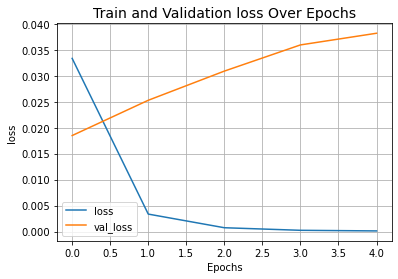

KeyError: 'binary_accuracy'

In [20]:
history = shallow_mlp_model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)





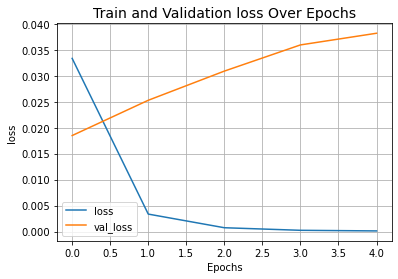

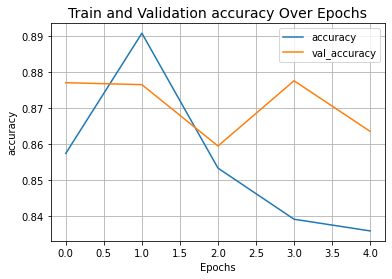

In [21]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("accuracy")

In [22]:
keras.models.save_model(shallow_mlp_model,'radEd_model_v1.hdf5')
#shallow_mlp_model = tf.keras.models.load_model('radEd_model_v1.hdf5')


In [23]:
_, binary_acc = shallow_mlp_model.evaluate(test_dataset)
print(f"Categorical accuracy on the test set: {round(binary_acc * 100, 2)}%.")

29/29 [==============================] - 5s 166ms/step - loss: 0.0382 - accuracy: 0.8579
Categorical accuracy on the test set: 85.79%.


In [24]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = [
        x
        for _, x in sorted(
            zip(predicted_probabilities[i], lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        )
    ][:3]
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

4/4 [==============================] - 0s 41ms/step
Abstract: b'Conventional saliency maps highlight input features to which neural network\npredictions are highly sensitive. We take a different approach to saliency, in\nwhich we identify and analyze the network parameters, rather than inputs, which\nare responsible for erroneous decisions. We find that samples which cause\nsimilar parameters to malfunction are semantically similar. We also show that\npruning the most salient parameters for a wrongly classified sample often\nimproves model behavior. Furthermore, fine-tuning a small number of the most\nsalient parameters on a single sample results in error correction on other\nsamples that are misclassified for similar reasons. Based on our parameter\nsaliency method, we also introduce an input-space saliency technique that\nreveals how image features cause specific network components to malfunction.\nFurther, we rigorously validate the meaningfulness of our saliency maps on both\nthe d